<pre>

</pre>

# ANALYSING CONDO PRICES IN TORONTO
***


<pre>

</pre>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from descartes import PolygonPatch
from scipy.stats import skew
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



## 1. SAMPLE DATA
***


In [2]:
print('')
print('')
data = pd.read_csv('forAnalysis/data.csv').drop(['street', 'city', 'province', 'neighbourhood','url'], axis=1).replace('Det Condo', 'Condo')
data.sample(1)

,sale_price,list_price,bedrooms,bathrooms,square_feet,days_on_market,house_type,parking_places,yearly_taxes,school_distance,transit_distance,medical_care_distance,city_center_distance,park_distance,businesses,child_care_spaces,debt_risk_score,income_gini_coeff,local_employment,social_assistance_recipients,break_enters,fires_and_alarms,sexual_assaults,thefts,vehicle_thefts,total_major_crime_incidents
1874,738000,749000,2,2,1500,7,Detached,1,3052.0,0.14,0.983,0.6,9.68,0.93,831,84,741,0.390859,15391,2688,116,296,24,8,66,583


## 2. ROW COUNT
***


In [3]:
data.shape[0]

2779


** 2779 ** rows were obtained by scraping the site.
<pre>
</pre>


## 3. DATA DISTRIBUTION
***


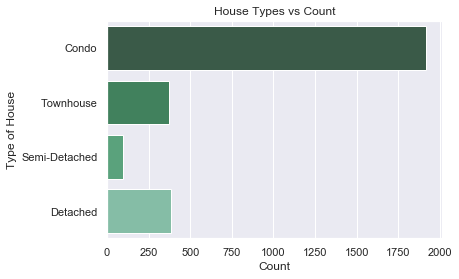

In [4]:
print('')
print('')
houseTypes = data.groupby("house_type").filter(lambda x: len(x) > 50)
fig = sns.countplot(y='house_type', data=houseTypes, palette='BuGn_d')
fig.set(xlabel='Count', ylabel='Type of House', title='House Types vs Count')
plt.show(fig)



## 4. GEO-MAPPING/HEAT MAP
***


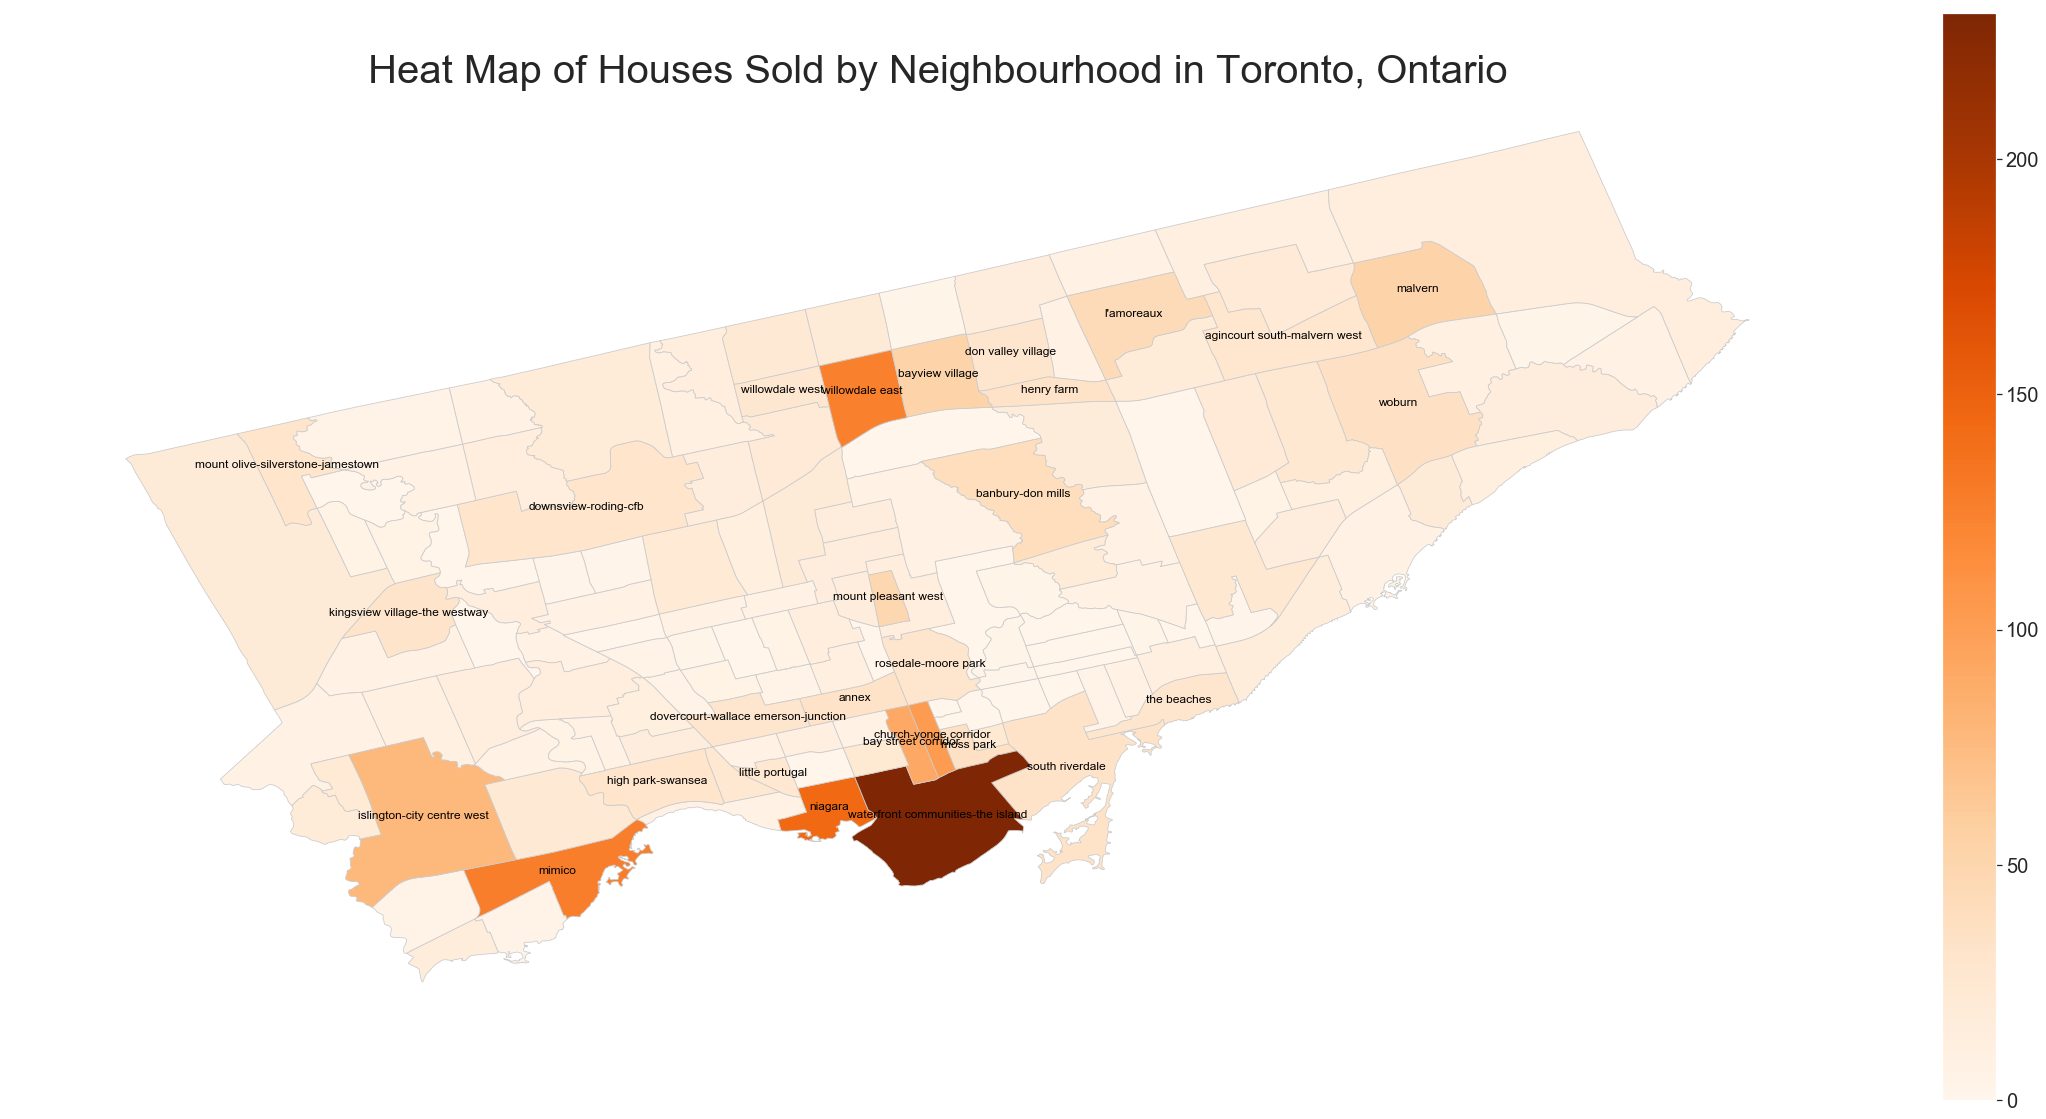

In [7]:
# Refer to https://medium.com/@m_vemuri/create-a-geographic-heat-map-of-the-city-of-toronto-in-python-cd2ae0f8be55
# to find out how to make this map! :)

## 5. CONVERTING AND FILTERING CONDOMINIUMS
***

In [6]:
print('')
print('')
modified_data = data
modified_data['house_type'].value_counts()

Condo               1915
Detached             385
Townhouse            373
Semi-Detached         94
Co-Ownership Apt       5
Triplex                2
Link                   2
Multiplex              1
Co-Op Apt              1
Duplex                 1
Name: house_type, dtype: int64

In [7]:
print('')
print('')
condos_all_columns = modified_data[modified_data['house_type'] == 'Condo']
condos_all_columns.sample(1)

,sale_price,list_price,bedrooms,bathrooms,square_feet,days_on_market,house_type,parking_places,yearly_taxes,school_distance,transit_distance,medical_care_distance,city_center_distance,park_distance,businesses,child_care_spaces,debt_risk_score,income_gini_coeff,local_employment,social_assistance_recipients,break_enters,fires_and_alarms,sexual_assaults,thefts,vehicle_thefts,total_major_crime_incidents
750,435000,439000,2,2,1399,42,Condo,1,1626.9,0.37,7.93,1.78,46.37,0.39,2090,220,770,0.372999,16901,1921,124,183,3,15,67,325


In [8]:
print('')
print('')
condos = condos_all_columns.drop(['house_type'], axis=1)
condos.sample(1)

,sale_price,list_price,bedrooms,bathrooms,square_feet,days_on_market,parking_places,yearly_taxes,school_distance,transit_distance,medical_care_distance,city_center_distance,park_distance,businesses,child_care_spaces,debt_risk_score,income_gini_coeff,local_employment,social_assistance_recipients,break_enters,fires_and_alarms,sexual_assaults,thefts,vehicle_thefts,total_major_crime_incidents
494,261000,239000,1,1,799,15,1,587.84,0.1,5.35,0.28,18.25,0.77,625,81,724,0.35291,11173,5078,118,283,37,3,51,729


In [9]:
condos.shape

(1915, 25)

In [10]:
condos.isnull().values.any()

False

In [11]:
condos[['sale_price']].describe().style.format({"sale_price": lambda x: "${:,.2f}".format(abs(x)) if x > 3000 else "{:.2f}".format(abs(x))})

,sale_price
count,1915.00
mean,"$627,137.38"
std,"$318,574.87"
min,"$47,500.00"
25%,"$460,000.00"
50%,"$560,000.00"
75%,"$690,000.00"
max,"$6,500,000.00"


## 6. DENSITY PLOT OF SALE PRICE
***

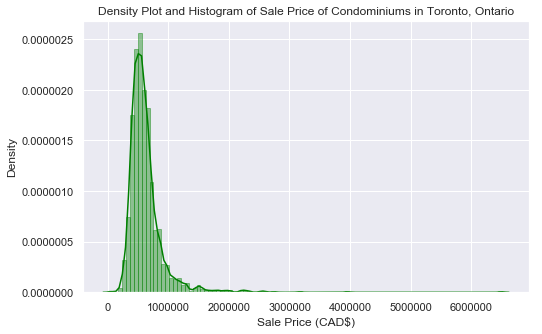

In [12]:
print('')
print('')
plt.figure(figsize=(8, 5))
fig = sns.distplot(condos['sale_price'], color='green', bins=100, hist_kws={'edgecolor':'green'});
plt.title('Density Plot and Histogram of Sale Price of Condominiums in Toronto, Ontario', fontsize='large')
plt.ylabel('Density')
plt.xlabel('Sale Price (CAD$)')
plt.show(fig)

In [13]:
condos['sale_price'].skew()

5.906281071445114

## 7. DENSITY PLOT OF SALE PRICE (NORMALIZED) 
***

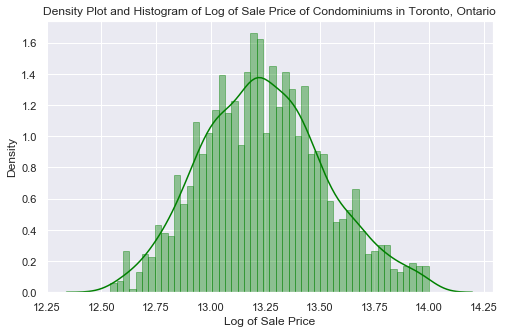

In [14]:
condos['log_sale_price'] = np.log(condos['sale_price'])
mean = condos['log_sale_price'].mean()
sd = condos['log_sale_price'].std()
condos_normalized = condos[np.abs(condos['log_sale_price'] - mean) < 2*sd]

print('')
print('')
plt.figure(figsize=(8, 5))
fig = sns.distplot(condos_normalized['log_sale_price'], color='green', bins=50, hist_kws={'edgecolor':'green'});
plt.title('Density Plot and Histogram of Log of Sale Price of Condominiums in Toronto, Ontario', fontsize='large')
plt.ylabel('Density')
plt.xlabel('Log of Sale Price')
plt.show(fig)

In [15]:
condos_normalized['log_sale_price'].skew()

0.2151143258994082

In [16]:
condos_normalized.shape

(1820, 26)

In [17]:
condos_normalized[['sale_price']].describe().style.format({"sale_price": lambda x: "${:,.2f}".format(abs(x)) if x > 3000 else "{:.2f}".format(abs(x))})

,sale_price
count,1820.00
mean,"$588,375.98"
std,"$173,871.16"
min,"$279,500.00"
25%,"$460,000.00"
50%,"$557,250.00"
75%,"$676,000.00"
max,"$1,200,000.00"


## 8. PAIR-WISE SCATTER PLOTS OF ALL FEATURES
***

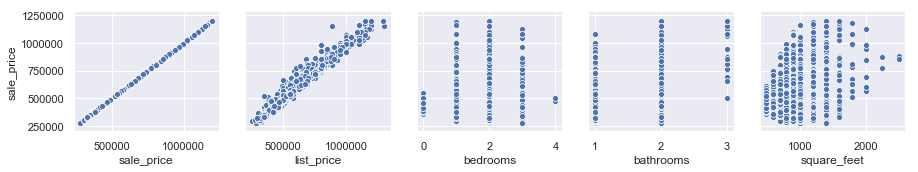

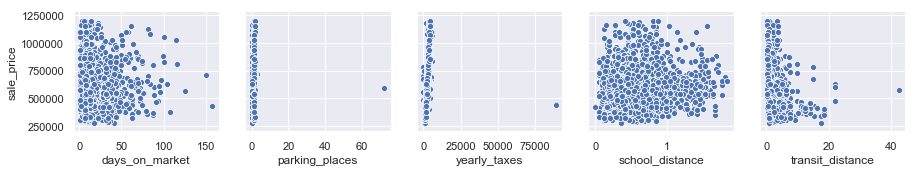

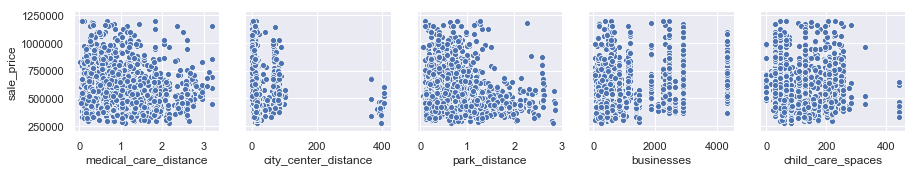

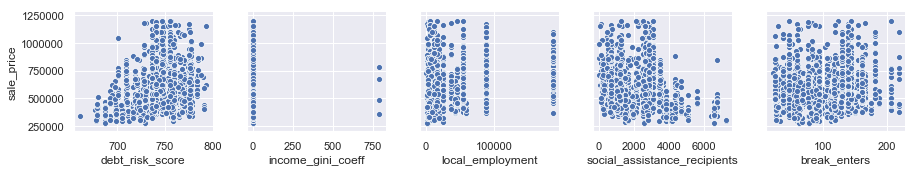

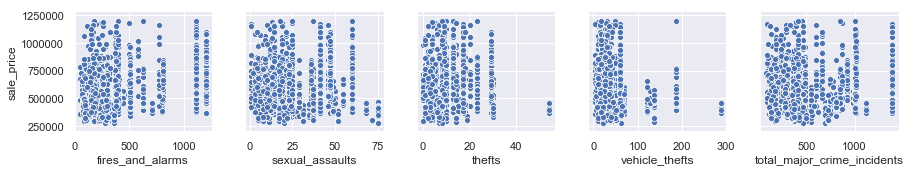

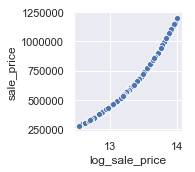

In [18]:
print('')
print('')

for i in range(0, len(condos_normalized.columns), 5):
    sns.pairplot(data=condos_normalized,
                x_vars=condos_normalized.columns[i:i+5],
                y_vars=['sale_price'])    

## 9. REMOVING OUTLIERS IN OTHER FEATURES AND REPLOTTING SCATTER PLOTS
***

In [19]:
condos_cleaned = condos_normalized[(condos_normalized['parking_places'] < 20 ) 
                                   & (condos_normalized['yearly_taxes'] < 25000) 
                                   & (condos_normalized['transit_distance'] < 30)
                                   & (condos_normalized['city_center_distance'] < 200)
                                   & (condos_normalized['thefts'] < 40)
                                   & (condos_normalized['income_gini_coeff'] < 40 )
                                           ]
condos_cleaned.shape

(1760, 26)

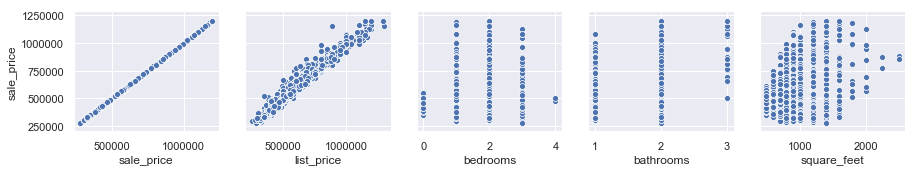

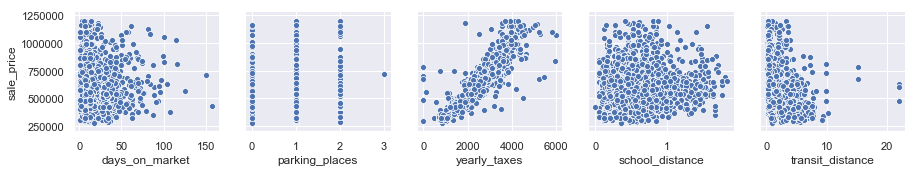

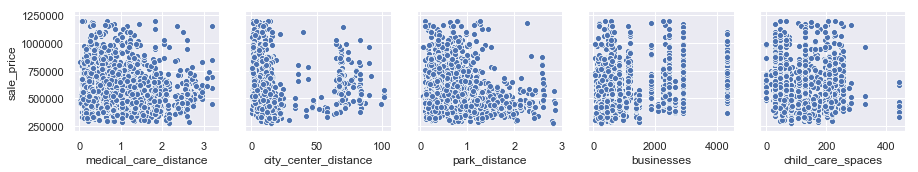

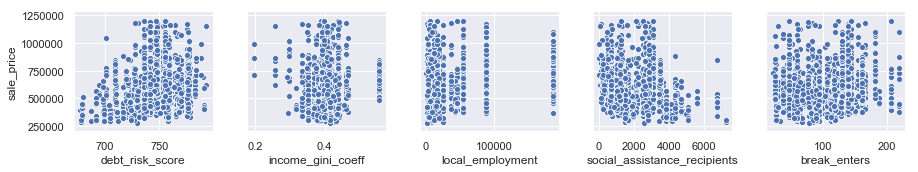

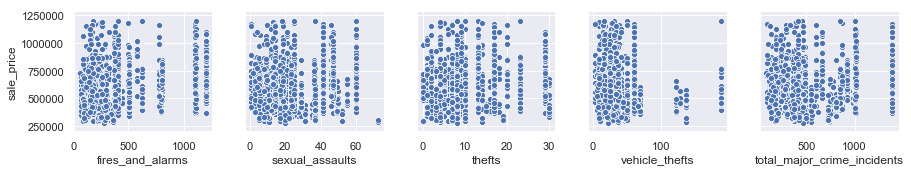

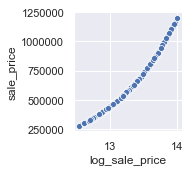

In [20]:
print('')
print('')

for i in range(0, len(condos_cleaned.columns), 5):
    sns.pairplot(data=condos_cleaned,
                x_vars=condos_cleaned.columns[i:i+5],
                y_vars=['sale_price'])

In [21]:
condos_cleaned['sale_price'].describe().apply(lambda x: format(x,'f'))

count       1760.000000
mean      593363.885227
std       173765.526225
min       280000.000000
25%       467125.000000
50%       560000.000000
75%       680000.000000
max      1200000.000000
Name: sale_price, dtype: object

In [22]:
condos_cleaned['log_sale_price'].skew()

0.19544742161038794

## 10. PEARSON CORRELATION OF ALL FEATURES WITH OUTCOME
***

In [23]:
print('')
print('')
condos_corr_cleaned = condos_cleaned.corr()['log_sale_price'][1:]
golden_features_cleaned_list = condos_corr_cleaned[abs(condos_corr_cleaned) > 0.1].sort_values(ascending=False)
print("There are {} strongly correlated values with Log Sale Price:\n{}".format(len(golden_features_cleaned_list), golden_features_cleaned_list))




There are 18 strongly correlated values with Log Sale Price:
log_sale_price                  1.000000
list_price                      0.961250
yearly_taxes                    0.886556
bathrooms                       0.373000
fires_and_alarms                0.308304
debt_risk_score                 0.271255
local_employment                0.265035
businesses                      0.264677
square_feet                     0.251013
total_major_crime_incidents     0.198109
bedrooms                        0.170696
thefts                          0.169478
sexual_assaults                 0.131436
break_enters                    0.125633
parking_places                  0.109175
park_distance                  -0.250178
social_assistance_recipients   -0.305269
transit_distance               -0.318992
Name: log_sale_price, dtype: float64


In [24]:
golden_features_cleaned_list.index

Index(['log_sale_price', 'list_price', 'yearly_taxes', 'bathrooms',
       'fires_and_alarms', 'debt_risk_score', 'local_employment', 'businesses',
       'square_feet', 'total_major_crime_incidents', 'bedrooms', 'thefts',
       'sexual_assaults', 'break_enters', 'parking_places', 'park_distance',
       'social_assistance_recipients', 'transit_distance'],
      dtype='object')

## 11. PAIR-WISE PEARSON CORRELATION
***


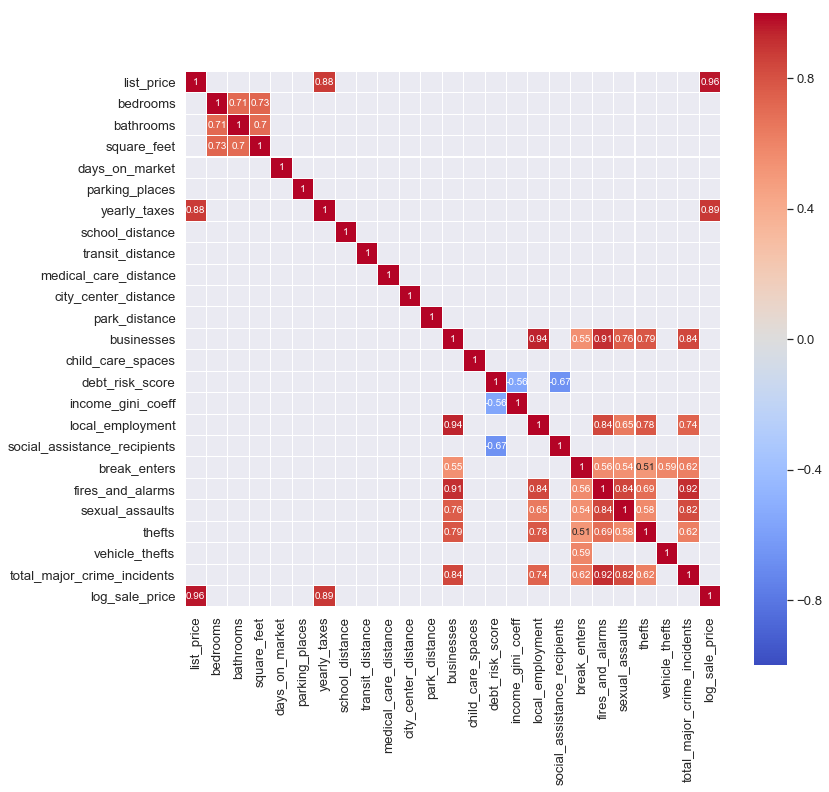

In [25]:
cleaned_corr = condos_cleaned.drop('sale_price', axis = 1).corr()
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.2)
sns.heatmap(cleaned_corr[(np.abs(cleaned_corr) >= 0.5) | (cleaned_corr == 1)], 
            cmap='coolwarm', vmax=1, vmin=-1, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

## 12. FEATURE SELECTION
***

In [26]:
golden_features_cleaned_list.index

Index(['log_sale_price', 'list_price', 'yearly_taxes', 'bathrooms',
       'fires_and_alarms', 'debt_risk_score', 'local_employment', 'businesses',
       'square_feet', 'total_major_crime_incidents', 'bedrooms', 'thefts',
       'sexual_assaults', 'break_enters', 'parking_places', 'park_distance',
       'social_assistance_recipients', 'transit_distance'],
      dtype='object')

In [27]:
golden_unstacked_corr = cleaned_corr.loc[golden_features_cleaned_list.index, golden_features_cleaned_list.index].unstack()
golden_unstacked_corr[(golden_unstacked_corr.abs() > 0.5) & (golden_unstacked_corr != 1)]

log_sale_price                list_price                      0.961250
                              yearly_taxes                    0.886556
list_price                    log_sale_price                  0.961250
                              yearly_taxes                    0.879152
yearly_taxes                  log_sale_price                  0.886556
                              list_price                      0.879152
bathrooms                     square_feet                     0.703789
                              bedrooms                        0.711302
fires_and_alarms              local_employment                0.840883
                              businesses                      0.914650
                              total_major_crime_incidents     0.916897
                              thefts                          0.692334
                              sexual_assaults                 0.844394
                              break_enters                    0.563208
debt_r

## 13. REGRESSION ANALYSIS
***

In [28]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [29]:
############################################
# First Model - selected features
###########################################


sc = StandardScaler()

X_original = condos_cleaned[['yearly_taxes', 'businesses',
       'square_feet', 'break_enters', 'parking_places', 'park_distance',
       'social_assistance_recipients', 'transit_distance']]

y = condos_cleaned['log_sale_price']
X = sc.fit_transform(X_original)
linearModel = linear_model.LinearRegression()
linear_score = cross_val_score(linearModel, X, y, cv = 10)

print('Linear model 1 accuracy: ', np.mean(linear_score))

model = linearModel.fit(X,y)
print('R-Squared: \n', model.score(X,y))
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
scores = cross_val_score(model, X, y, cv=10)
print('Cross Validation Scores: \n', scores)
print('\nAverage Accuracy: {}'.format(np.mean(scores)))
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Print out the statistics
model.summary()

Linear model 1 accuracy:  0.7951379918974435
R-Squared: 
 0.7997820048346587
Intercept: 
 13.253426767235963
Coefficients: 
 [ 0.22344751  0.01931482  0.02761301  0.00245046  0.007251   -0.02140354
 -0.01866655 -0.00764285]
Cross Validation Scores: 
 [0.86489429 0.75807808 0.84995199 0.75876826 0.72799924 0.80958705
 0.75601648 0.75083514 0.86875572 0.80649366]

Average Accuracy: 0.7951379918974435


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_sale_price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     874.3
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        02:27:10   Log-Likelihood:                 1152.2
No. Observations:                1760   AIC:                            -2286.
Df Residuals:                    1751   BIC:                            -2237.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2534      0.003   4410.880      0.000      13.248      13.259
x1             0.2234      0.004     56.533      0.000       0.216       0.231
x2             0.0193      0.004      4.789      0.000       0.011       0.027
x3             0.0276      0.004      7.363      0.000       0.020       0.035
x4             0.0025      0.004      0.630      0.529      -0.005       0.010
x5             0.0073      0.003      2.131      0.033       0.001       0.014
x6            -0.0214      0.003     -6.682      0.000      -0.028      -0.015
x7            -0.0187      0.004     -5.202      0.000      -0.026      -0.012
x8            -0.0076      0.004     -2.148      0.032      -0.015      -0.001
==============================================================================
Omnibus:                      320.656   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5489.182
Skew:                           0.320   Prob(JB):                         0.00
Kurtosis:                      11.628   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

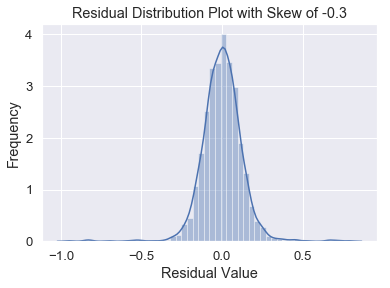

In [30]:
residuals = predictions - y
sns.distplot(residuals)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residual Distribution Plot with Skew of -0.3')
plt.show()


## 14. KMEANS CLUSTERING FOR SOCIO-ECONOMIC VARIABLES VS SALE PRICE
***

In [31]:
############################################
# Fourth model all features
############################################

X4_original = condos_cleaned.iloc[:,2:25]

X4 = sc.fit_transform(X4_original)

y4 = condos_cleaned['log_sale_price']

linearModel4 = linear_model.LinearRegression()
linear_score4 = cross_val_score(linearModel4, X4, y4, cv = 10)

print('Linear model 4 accuracy: ', np.mean(linear_score4))


model4 = linearModel4.fit(X4,y4)

print('R-Squared: \n', model4.score(X4,y4))
print('Intercept: \n', model4.intercept_)
print('Coefficients: \n', model4.coef_)
scores4 = cross_val_score(model4, X4, y4, cv=10)
print('Cross Validation Scores: \n', scores4)
print('\nAverage Accuracy: {}'.format(np.mean(scores4)))


x4 = sm.add_constant(X4)
model4 = sm.OLS(y4, x4).fit()
predictions = model4.predict(x4)

model4.summary()

Linear model 4 accuracy:  0.8236611625359462
R-Squared: 
 0.831871064290193
Intercept: 
 13.253426767235963
Coefficients: 
 [ 0.00807902  0.02949302  0.0211603  -0.01223962  0.01105085  0.1986476
  0.00998604 -0.01069755  0.01298931 -0.01113045 -0.01087425 -0.02431009
  0.00316682 -0.00901195  0.01476469 -0.02304404 -0.064435   -0.00444938
  0.05270837 -0.00349306  0.00278768 -0.01137757  0.05437557]
Cross Validation Scores: 
 [0.86806366 0.79480259 0.85887877 0.78812348 0.77436878 0.83636191
 0.81733777 0.77552272 0.89709651 0.82605543]

Average Accuracy: 0.8236611625359462


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_sale_price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     373.5
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        02:27:10   Log-Likelihood:                 1305.9
No. Observations:                1760   AIC:                            -2564.
Df Residuals:                    1736   BIC:                            -2432.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2534      0.003   4792.778      0.000      13.248      13.259
x1             0.0081      0.005      1.765      0.078      -0.001       0.017
x2             0.0295      0.005      6.455      0.000       0.021       0.038
x3             0.0212      0.005      4.427      0.000       0.012       0.031
x4            -0.0122      0.003     -4.347      0.000      -0.018      -0.007
x5             0.0111      0.003      3.413      0.001       0.005       0.017
x6             0.1986      0.004     49.094      0.000       0.191       0.207
x7             0.0100      0.003      3.096      0.002       0.004       0.016
x8            -0.0107      0.004     -3.014      0.003      -0.018      -0.004
x9             0.0130      0.003      3.992      0.000       0.007       0.019
x10           -0.0111      0.003     -3.952      0.000      -0.017      -0.006
x11           -0.0109      0.003     -3.285      0.001      -0.017      -0.004
x12           -0.0243      0.014     -1.699      0.089      -0.052       0.004
x13            0.0032      0.004      0.829      0.407      -0.004       0.011
x14           -0.0090      0.006     -1.503      0.133      -0.021       0.003
x15            0.0148      0.004      3.480      0.001       0.006       0.023
x16           -0.0230      0.012     -2.000      0.046      -0.046      -0.000
x17           -0.0644      0.006    -10.735      0.000      -0.076      -0.053
x18           -0.0044      0.005     -0.930      0.352      -0.014       0.005
x19            0.0527      0.014      3.852      0.000       0.026       0.080
x20           -0.0035      0.007     -0.514      0.607      -0.017       0.010
x21            0.0028      0.006      0.488      0.626      -0.008       0.014
x22           -0.0114      0.004     -2.552      0.011      -0.020      -0.003
x23            0.0544      0.011      5.177      0.000       0.034       0.075
==============================================================================
Omnibus:                      286.295   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3884.627
Skew:                           0.295   Prob(JB):                         0.00
Kurtosis:                      10.254   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

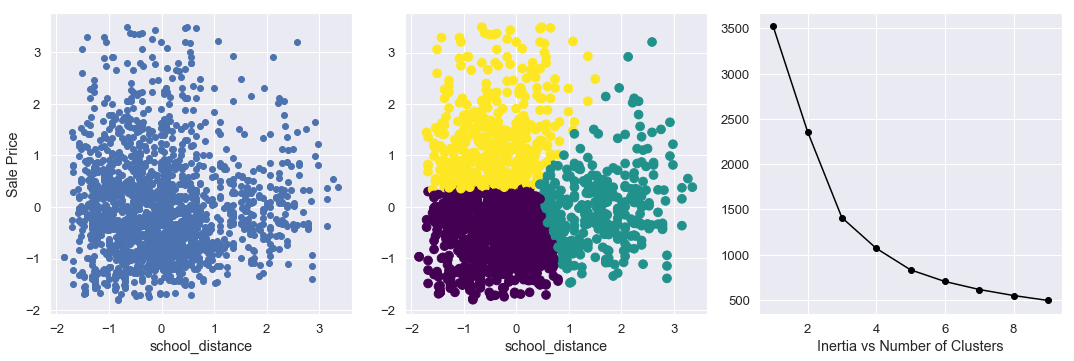

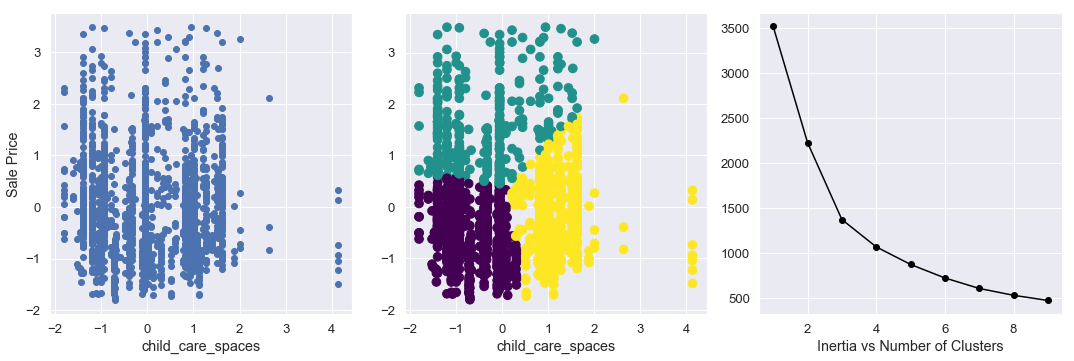

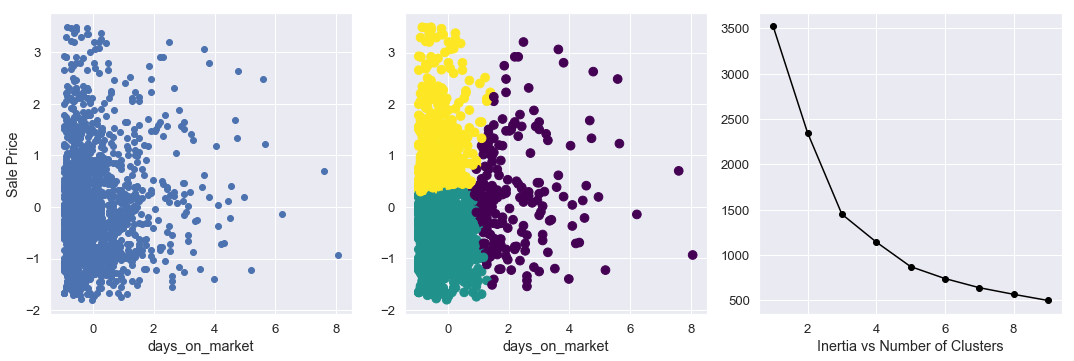

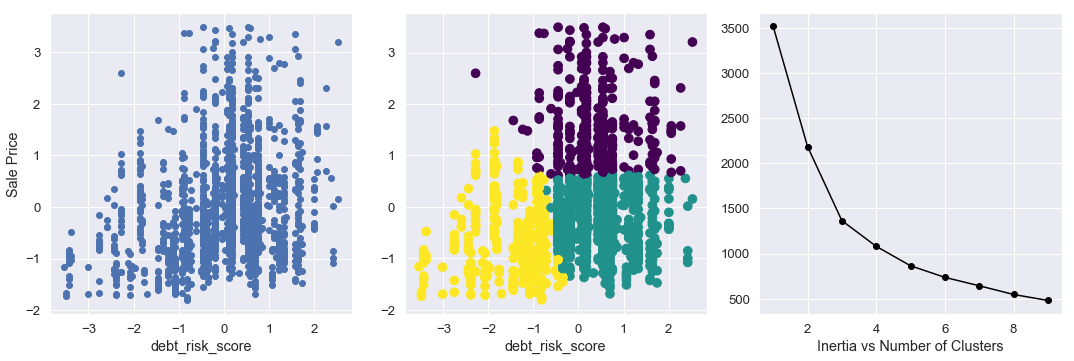

In [32]:
from sklearn.cluster import KMeans
# sev = condos_cleaned.iloc[:,13:25]
sev = condos_cleaned.iloc[:, [8, 14, 5, 15]]
sev['sale_price'] = condos_cleaned['sale_price']

scaled_features = sc.fit_transform(sev)

sev_norm = pd.DataFrame(scaled_features, index=sev.index, columns=sev.columns)

# k_values = [3,3,3,6,5,3,3,3,3,3,3,3]
k_values = [3,3,3,3,5,3,3,3,3,3,3,3]
for i in range(0, 4):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))
    
    f.tight_layout()
    
    ax1.scatter(sev_norm.iloc[:,i],sev_norm.iloc[:,4])
    ax1.set_ylabel('Sale Price')
    ax1.set_xlabel(sev_norm.columns[i])

    inertias = []
    ks = range(1, 10)
    x_norm = sev_norm.iloc[:,[i,4]]
    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(x_norm)
        inertias.append(model.inertia_)
    
    kmeans = KMeans(n_clusters=k_values[i], init='k-means++', random_state=170)
    kmeans = kmeans.fit(x_norm)
    
    ax2.scatter(sev_norm.iloc[:, i], 
            sev_norm.iloc[:, 4], 
            c=kmeans.labels_, 
            cmap='viridis', 
            s=75)
    ax2.set_xlabel(sev_norm.columns[i])
        
    ax3.plot(ks, inertias, '-o', color='black')
    ax3.set_xlabel('Inertia vs Number of Clusters')

    plt.show()
    

## 15. KMEANS FOR SELECTED FEATURES
***

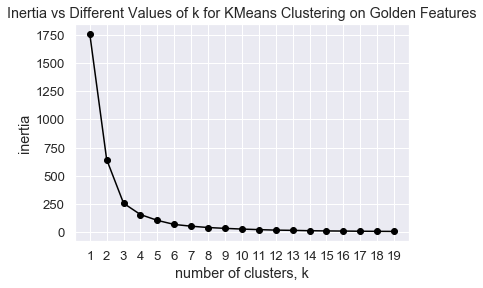

In [33]:
k_data = condos_cleaned[[
    'school_distance',
#     'child_care_spaces',
#     'days_on_market',
#     'debt_risk_score'
]]

k_data_norm = sc.fit_transform(k_data)



ks = range(1, 20)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(k_data_norm)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.title('Inertia vs Different Values of k for KMeans Clustering on Golden Features')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=170)
kmeans = kmeans.fit(k_data_norm)

print("The cluster centroids are: \n", kmeans.cluster_centers_)
print("Cluster_label:\n", kmeans.labels_)
kmeans.labels_

The cluster centroids are: 
 [[ 0.2294081 ]
 [-0.89168577]
 [ 1.88778306]]
Cluster_label:
 [1 0 1 ... 1 0 2]


array([1, 0, 1, ..., 1, 0, 2], dtype=int32)

## 16. CLUSTER PRICE VARIATIONS
***

In [35]:
# Apply cluster labels to original dataframe
condos_cleaned['cluster'] = kmeans.labels_
kmeans_condos = condos_cleaned
kmeans_condos['cluster'] = kmeans_condos['cluster'] + 1

In [36]:
kmeans_condos.groupby('cluster')[['sale_price', 'school_distance']].mean().reset_index()\
.style.format({"sale_price": "${:,.2f}", "school_distance": "{:.2f}"})


,cluster,sale_price,school_distance
0,1,"$576,020.29",0.73
1,2,"$604,791.84",0.34
2,3,"$614,761.46",1.32
